# Exploratory data analysis

## Prepare packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pickle

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Visualization tools

In [4]:
import plotly.express as px

In [5]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [6]:
import plotly.graph_objects as go

## Read the data

We're reading data which is produced by notebook "Data cleaning & enrichment.ipynb"

In [7]:
inspection_table = pd.read_pickle('inspection_table.pickle')

In [8]:
license_table = pd.read_pickle('license_table.pickle')

In [9]:
location_table = pd.read_pickle('location_table.pickle')

#### Weather data

In [10]:
weather_data = pd.read_pickle('daytime_agg_weather_history.pickle')

### Available columns

In [11]:
inspection_table.columns

Index(['InspectionID', 'LocationID', 'Risk', 'InspectionDate',
       'InspectionType', 'Results', 'InspectionDate_dt'],
      dtype='object')

In [12]:
license_table.columns

Index(['licenseNumber', 'facilityType', 'address', 'city', 'state', 'zip',
       'LocationID'],
      dtype='object')

In [13]:
location_table.columns

Index(['LocationID', 'dbaName', 'akaName', 'lat', 'long'], dtype='object')

## Quantitative statistics

### Inspection type

In [14]:
inspections_through_time = inspection_table[['InspectionDate', 'InspectionType', 'Results']]

In [15]:
inspections_through_time

InspectionDate           InspectionType             Results
0          11/15/2019                  Canvass  Pass w/ Conditions
1          11/14/2019                  Canvass                Pass
2          11/14/2019                Complaint                Fail
3          11/14/2019                  License                Fail
4          11/14/2019                  License                Fail
...               ...                      ...                 ...
195929     01/06/2010  Complaint Re-Inspection                Pass
195930     02/22/2010                Complaint                Pass
195931     01/13/2010                  Canvass                Pass
195932     03/11/2010                Complaint                Pass
195933     02/02/2010                  License                Pass

[195934 rows x 3 columns]

In [16]:
inspections_through_time_aggr = inspections_through_time.groupby(['InspectionType', 
                                                                  'Results']).size().reset_index(name='counts')

In [17]:
inspections_through_time_aggr.sort_values('counts', ascending=False)

InspectionType             Results  counts
19                                     Canvass                Pass   48792
15                                     Canvass                Fail   17666
18                                     Canvass     Out of Business   16584
25                       Canvass Re-Inspection                Pass   16396
20                                     Canvass  Pass w/ Conditions   15784
..                                         ...                 ...     ...
78                       LICENSE WRONG ADDRESS                Fail       1
77   LICENSE TASK FORCE / NOT -FOR-PROFIT CLUB                Pass       1
76    LICENSE TASK FORCE / NOT -FOR-PROFIT CLU                Pass       1
73      LICENSE RENEWAL INSPECTION FOR DAYCARE                Pass       1
204             task force(1470) liquor tavern                Fail       1

[205 rows x 3 columns]

#### Inspection type and their counts, groupped by result of the inspection

In [18]:
fig = px.bar(inspections_through_time_aggr[
                inspections_through_time_aggr['InspectionType'].isin(['Canvass', 'Canvass Re-Inspection', 
                                                                      'Complaint', 'License'])], 
             x='InspectionType', y="counts", 
             color='Results', barmode='stack')
fig.show()

#### Inspection results

In [19]:
result_type = inspections_through_time['Results'].value_counts().keys().tolist()
result_count = inspections_through_time['Results'].value_counts().tolist()

fig = go.Figure(data=[go.Pie(labels=result_type, values=result_count, hole=.3)])

fig.show()

### Facility type

#### Number of facility types

In [20]:
license_table

licenseNumber facilityType                address     city state  \
0           2163956.0   Restaurant    2811 N ASHLAND AVE   CHICAGO    IL   
1           2694084.0   Restaurant     738 W RANDOLPH ST   CHICAGO    IL   
2           2446547.0   Restaurant   3426 W DIVERSEY AVE   CHICAGO    IL   
3           2652941.0   Restaurant    2309 N LINCOLN AVE   CHICAGO    IL   
4           2652943.0   Restaurant    2309 N LINCOLN AVE   CHICAGO    IL   
...               ...          ...                    ...      ...   ...   
195929      1991580.0   Restaurant  2886 N MILWAUKEE AVE   CHICAGO    IL   
195930      1843997.0       School       45 W NORTH BLVD   CHICAGO    IL   
195931        24462.0       School       2318 N Lorel ST   CHICAGO    IL   
195932      1222412.0   Restaurant   6966 N GLENWOOD AVE   CHICAGO    IL   
195933      2016897.0   Restaurant     3312 W Foster AVE   CHICAGO    IL   

            zip  LocationID  
0       60657.0           0  
1       60661.0           1  
2       60647.0           2  
3       60614.0           3  
4       60614.0           3  
...         ...         ...  
195929  60618.0        9199  
195930  60610.0       18535  
195931  60639.0       22789  
195932  60626.0       47178  
195933  60625.0       29097  

[195934 rows x 7 columns]

In [21]:
license_type_counts = license_table['facilityType'].value_counts()
license_type_counts

Restaurant                                 130632
Grocery Store                               24950
School                                      12113
Children's Services Facility                 3084
Bakery                                       2861
                                            ...  
WHOLESALE & RETAIL                              1
SERVICE BAR/THEATRE                             1
MOBILE DESSERT CART                             1
ART GALLERY                                     1
FROZEN DESSERTS DISPENSER-NON-MOTORIZED         1
Name: facilityType, Length: 488, dtype: int64

In [22]:
first_10_lic = license_type_counts[0:9]
total_v_first_10_lic = sum(first_10_lic.values)
first_10_lic_per = {k: int(round((v/total_v_first_10_lic)*100)) for k, v in first_10_lic.items()}

In [23]:
first_10_lic_per

{'Restaurant': 72,
 'Grocery Store': 14,
 'School': 7,
 "Children's Services Facility": 2,
 'Bakery': 2,
 'Daycare (2 - 6 Years)': 1,
 'Daycare Above and Under 2 Years': 1,
 'Long Term Care': 1,
 'Catering': 1}

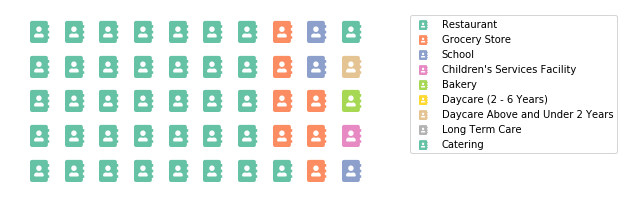

In [24]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=first_10_lic_per, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    icons='address-book', 
    font_size=22, 
    icon_legend=True,
    figsize=(9, 5)
)
plt.show()

#### Number of facility types, normalized to "change of license"

In [25]:
_current_licenses = license_table.sort_values(['LocationID', 
                                               'licenseNumber'], ascending=False).groupby('LocationID').head(1)

In [26]:
current_licenses = _current_licenses[['LocationID', 'licenseNumber', 'facilityType']]

In [27]:
current_licenses

LocationID  licenseNumber          facilityType
58748       58780      2549387.0         Grocery Store
58745       58777      2068945.0            Restaurant
58739       58771      2560001.0            Restaurant
58695       58727      2551199.0                Liquor
58670       58702      2405070.0            Restaurant
...           ...            ...                   ...
6               6      2631346.0  Mobile Food Preparer
4               3      2652943.0            Restaurant
2               2      2446547.0            Restaurant
5               1      2695025.0            Restaurant
30780           0      2522268.0            Restaurant

[25283 rows x 3 columns]

In [28]:
latest_license_type_counts = current_licenses['facilityType'].value_counts()
latest_license_type_counts

Restaurant                      13217
Grocery Store                    4357
School                           1047
Children's Services Facility      400
Bakery                            375
                                ...  
CHURCH/SPECIAL EVENT                1
NEWSSTAND                           1
COFFEE KIOSK                        1
TEMPORARY KIOSK                     1
NOT FOR PROFIT                      1
Name: facilityType, Length: 413, dtype: int64

In [29]:
first_10_lic = latest_license_type_counts[0:9]
total_v_first_10_lic = sum(first_10_lic.values)
first_10_lic_per = {k: int(round((v/total_v_first_10_lic)*100)) for k, v in first_10_lic.items()}

In [30]:
first_10_lic_per

{'Restaurant': 64,
 'Grocery Store': 21,
 'School': 5,
 "Children's Services Facility": 2,
 'Bakery': 2,
 'Daycare (2 - 6 Years)': 2,
 'Liquor': 1,
 'Mobile Food Dispenser': 1,
 'Daycare Above and Under 2 Years': 1}

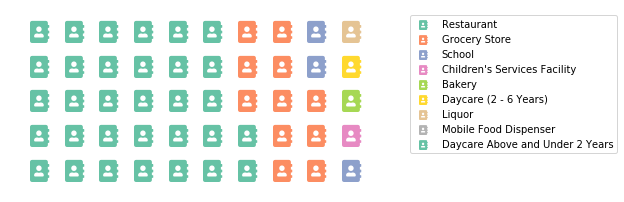

In [31]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=first_10_lic_per, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    icons='address-book', 
    font_size=22, 
    icon_legend=True,
    figsize=(9, 5)
)
plt.show()

## Time-series analysis

### Exploratory analysis of time-series data (part I)

### Exploratory analysis of time-series data (part II)

## Geospatial analysis

In [37]:
px.set_mapbox_access_token(open(".mapbox_token").read())

### License types

In [34]:
current_with_geo = current_licenses.join(location_table, 
                                         on=('LocationID'), lsuffix='_lic', rsuffix='_loc', how='inner')

In [35]:
current_with_geo.head(5)

LocationID  LocationID_lic  licenseNumber   facilityType  \
58249       58281           58281      2559804.0  Grocery Store   
58229       58261           58261      2555958.0     Restaurant   
57997       58029           58029      2529812.0  Grocery Store   
57812       57844           57844      2232837.0     Restaurant   
57683       57715           57715      2551311.0     Restaurant   

       LocationID_loc                       dbaName  \
58249           58313         ROBERT MORRIS COLLEGE   
58229           58293  SEATTLE SUTTON'S HEALTHY EAT   
57997           58061        McDONALD'S STORE #4061   
57812           57876              LIAM DOLLAR PLUS   
57683           57747    SUPER DISCOUNT STORE ON 87   

                            akaName        lat       long  
58249                  EAGLE'S CAFE  41.876867 -87.627503  
58229  SEATTLE SUTTON'S HEALTHY EAT  41.932905 -87.645128  
57997        McDONALD'S STORE #4061  41.879500 -87.633354  
57812              LIAM DOLLAR PLUS  41.882477 -87.755195  
57683    SUPER DISCOUNT STORE ON 87  41.735266 -87.704080

In [47]:
current_with_geo.facilityType.value_counts()[0:10]

Restaurant                         6607
Grocery Store                      1825
School                              509
Children's Services Facility        194
Bakery                              172
Daycare (2 - 6 Years)               156
Daycare Above and Under 2 Years     132
Liquor                              132
Mobile Food Dispenser               112
Wholesale                            73
Name: facilityType, dtype: int64

In [43]:
current_with_geo2 = current_with_geo[~pd.isna(current_with_geo['facilityType'])]

In [48]:
current_with_geo2 = current_with_geo2[current_with_geo2.facilityType.isin(['Restaurant', 
                                                                           'Grocery Store', 
                                                                           'School', 
                                                                           "Children's Services Facility", 
                                                                           'Bakery'])]

In [51]:
fig = px.scatter_mapbox(current_with_geo2, lat="lat", lon="long", 
                        hover_name="licenseNumber", hover_data=["dbaName", "akaName"],
                        color="facilityType")

# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# fig.update_layout(
#     hovermode='closest',
#     mapbox=go.layout.Mapbox(
#         bearing=0,
#         center=go.layout.mapbox.Center(
#             lat=41.881,
#             lon=-87.623
#         ),
#         pitch=0,
#         zoom=10
#     )
# )

fig.show()